In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm
from scipy.stats import beta

# Метод максимального правдоподобия (Maximum Likelihood Estimation)

## Мотивационный пример

**Дано**: выборка людей и их рост $\{\hat{X}_1, ..., \hat{X}_n\}$

**Модель**: рост распределен нормально $X \sim \mathcal{N}(\mu, \sigma^2)$

**Задача**: оценить параметры $\mu, \sigma^2$

### Ответ

$\hat{\mu} = \bar{X}, \hat{\sigma}^2 = S_n^2$

### Проверка на данных

In [2]:
# load data and convert to metric system

path = 'datasets/weight-height.csv'

data = pd.read_csv(path)
data['Height'] *= 2.54
data['Weight'] /= 2.205
data.head(2)

,Gender,Height,Weight
0,Male,187.571423,109.702296
1,Male,174.706036,73.610192


In [3]:
# split data into male and female datasets

data_male = data[data['Gender'] == 'Male'].copy()
data_female = data[data['Gender'] == 'Female'].copy()

In [4]:
# find mean and std of male and female height dataset

print('Male height statistics \n', data_male.describe()['Height'][['mean', 'std']])

print('\nFemale height statistics \n', data_female.describe()['Height'][['mean', 'std']])

Male height statistics 
 mean    175.326919
std       7.272940
Name: Height, dtype: float64

Female height statistics 
 mean    161.820285
std       6.848561
Name: Height, dtype: float64


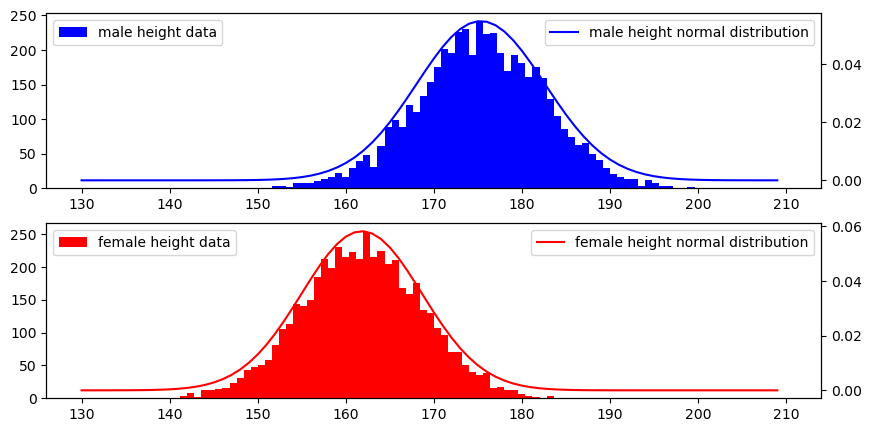

In [5]:
# plot histograms of height datasets

fig, axes = plt.subplots(2,1, figsize=(10,5))

axes[0].hist(data_male['Height'], label='male height data', bins=100, color='blue', range=[130, 210])
axes[1].hist(data_female['Height'], label='female height data', bins=100, color='red', range=[130, 210])

axes[0].legend(loc=2, fontsize=10)
axes[1].legend(loc=2, fontsize=10)

# plot pdfs of normal distribution with optimal mean and std

axes_twinx = [axes[0].twinx(), axes[1].twinx()]

x_axis = np.arange(130, 210, 1)

axes_twinx[0].plot(x_axis, norm.pdf(x_axis, data_male.describe()['Height']['mean'], data_male.describe()['Height']['std']), label='male height normal distribution', color='blue')
axes_twinx[1].plot(x_axis, norm.pdf(x_axis, data_female.describe()['Height']['mean'], data_female.describe()['Height']['std']), label='female height normal distribution', color='red')

axes_twinx[0].legend(loc=1, fontsize=10)
axes_twinx[1].legend(loc=1, fontsize=10)

plt.show()

## Определения

Случайные величины $X_1, ..., X_n \sim p_{\theta}(x_1, ..., x_n) $

Выборка $\{ \hat{X}_1, ..., \hat{X}_n \}$, где $\hat{X}_i$ - реализация случайной величины $X_i$

Правдоподобие $L(\theta) = p_{\theta}(\hat{X}_1, ..., \hat{X}_n)$

Лог-правдоподобие $l(\theta) = \ln p_{\theta}(\hat{X}_1, ..., \hat{X}_n)$

ММП-оценка параметра $\hat{\theta} = \arg \max \limits_{\theta} L(\theta) = \arg \max \limits_{\theta} l(\theta)$

## Аналитический вывод ММП-параметров для модели независимых наблюдений

### Модель

$X_i \overset{iid}{\sim} \mathcal{N}(\mu, \sigma^2)$

### Параметры

$\theta = (\mu, \sigma^2)$

### Выборка

$\{\hat{X}_i\}_{i=1}^{n}$, где $\hat{X}_i$ - реализация случайной величины $X_i$

### Правдоподобие

$L(\theta) = p_{\theta}(\hat{X}_1, ..., \hat{X}_n) = \prod \limits_{i=1}^{n} p_{\mathcal{N}( \mu, \sigma^2)}(\hat{X}_i)  = \prod \limits_{i=1}^{n} \frac{1}{\sqrt{2 \pi \sigma^2 }} \exp \bigl[ - \frac{(\hat{X}_i - \mu)^2}{2 \sigma^2}\bigr]$

$l(\theta) = \sum \limits_{i=1}^{n} \ln p_{\mathcal{N}( \mu, \sigma^2)}(\hat{X}_i)
= - \frac{n}{2} \ln (2 \pi \sigma^2) - \sum \limits_{i=1}^n \frac{(\hat{X}_i - \mu)^2}{2 \sigma^2}$

### ММП-оценки

$l'_{\mu} = - \sum \limits_{i=1}^n \frac{- 2 (\hat{X}_i - \mu)}{2 \sigma^2} = 0$

$\hat{\mu}_{MLE} = \frac{1}{n} \sum \limits_{i=1}^n \hat{X}_i$


$l'_{\sigma^2} = - \frac{n}{2} \frac{1}{\sigma^2}  + \frac{1}{2 \sigma^4} \sum \limits_{i=1}^n (\hat{X}_i - \mu)^2 = 0$


$\hat{\sigma}^2_{MLE} = \frac{1}{n} \sum \limits_{i=1}^n (\hat{X}_i - \hat{\mu})^2$

## Авторегрессия

### Модель

$X_0 = 0$

$X_{i+1} = \alpha \cdot X_i + \epsilon_{i+1} $

$\epsilon_i \overset{iid}{\sim}  \mathcal{N}(0, \sigma^2)$


### Параметры

$\theta = (\alpha, \sigma^2)$

### Выборка

$\{\hat{X}_i\}_{i=0}^{n}$, где $\hat{X}_i$ - реализация случайной величины $X_i$

$\hat{\epsilon}_i =\hat{X}_{i} - \alpha \hat{X}_{i-1}$

### Правдоподобие

$X_{i+1} = \alpha \cdot X_i + \epsilon_{i+1}, \quad X_{i+1} | X_i \sim \mathcal{N}(\alpha X_i, \sigma^2)$


$L(\theta) = p_{\theta}(\hat{X}_1, ..., \hat{X}_n) = p_{\theta}(\hat{X}_1) p_{\theta}(\hat{X}_2 | \hat{X}_1) ... p_{\theta}(\hat{X}_n | \hat{X}_{n-1}, ... \hat{X}_1)  = \prod \limits_{i=1}^n p_{\theta}(\hat{X}_i | \hat{X}_{i-1}) = \prod \limits_{i=1}^n p_{\mathcal{N}(\alpha \hat{X}_{i-1}, \sigma^2)}(\hat{X}_i)$

$L(\theta) = p_{\theta}(\hat{\epsilon}_1, ..., \hat{\epsilon}_n) = \prod \limits_{i=1}^n p_{\theta}(\hat{\epsilon}_i)  = \prod \limits_{i=1}^n p_{\mathcal{N}(0, \sigma^2)}(\hat{X}_i - \alpha \hat{X}_{i-1})$

$l(\theta) = - \frac{n}{2} \ln (2 \pi \sigma^2) - \sum \limits_{i=1}^n \frac{(\hat{X}_i - \alpha \cdot \hat{X}_{i-1})^2}{2 \sigma^2} =  - \frac{n}{2} \ln (2 \pi \sigma^2) - \sum \limits_{i=1}^n \frac{\hat{X}_i ^2  - 2\alpha \cdot \hat{X}_i \hat{X}_{i-1} + (\alpha \cdot \hat{X}_{i-1})^2}{2 \sigma^2}$

### ММП-оценки


$l'_{\alpha} =  - \sum \limits_{i=1}^n \frac{ - 2 \cdot \hat{X}_i \hat{X}_{i-1} + 2\alpha \cdot \hat{X}_{i-1}^2}{2 \sigma^2}
= -\frac{1}{ \sigma^2} [ - \sum \limits_{i=1}^n \hat{X}_i \hat{X}_{i-1} + \alpha \cdot \sum \limits_{i=1}^n \hat{X}_{i-1}^2 ]= 0$

$\hat{\alpha}_{MLE} = \frac{\sum \limits_{i=1}^n \hat{X}_i \hat{X}_{i-1} }{ \sum \limits_{i=1}^n \hat{X}_{i-1}^2}$

$l'_{\sigma^2} = - \frac{n}{2} \frac{1}{\sigma^2}  + \frac{1}{2\sigma^4} \sum \limits_{i=1}^n (\hat{X}_i - \alpha \cdot \hat{X}_{i-1})^2 = 0$

$\hat{\sigma}^2_{MLE} = \frac{1}{n} \sum \limits_{i=1}^n (\hat{X}_i - \hat{\alpha} \cdot \hat{X}_{i-1})^2$

## Пример c 2 кофейнями

**Дано**: выборка $\{(\hat{c}_1, \hat{T}_1), ..., (\hat{c}_n, \hat{T}_n)\}, \; \hat{c}_i \in \{0,1\} - \text{номер кофейни}, \; \hat{T}_i - \text{время ожидания в очереди}$

**Найти**: популярность кофейн и распределение времени ожидания в них


### Модель

$с_i \overset{iid}{\sim} Bern(q), \; T_i | c_i  \overset{iid}{\sim} Exp(\lambda_{c_i}), \; p_{\theta}((c_i, T_i)) = p_{q}(c_i) \cdot p_{\lambda_{c_i}}(T_i | c_i)$

### Параметры

$\theta = (q, \lambda_0, \lambda_1)$

### Выборка

$\{(\hat{c}_i, \hat{T}_i)\}_{i=0}^{n}$, где $\hat{c}_i$ - реализация случайной величины $c_i$, a $\hat{T}_i$ - реализация случайной величины $T_i$



### Правдоподобие

$L(\theta) = p_{\theta}((\hat{c}_1, \hat{T}_1), ..., (\hat{c}_n, \hat{T}_n)) = \prod \limits_{i=1}^{n} p_{q}(\hat{c}_i ) p_{\lambda_{c_i}}(\hat{T}_i | \hat{c}_i) = \prod \limits_{i=1}^{n} q^{\hat{c}_i} (1-q)^{1-\hat{c}_i} \cdot \lambda_{\hat{c}_i} \exp ( - \lambda_{\hat{c}_i} \hat{T}_i)$

$l(\theta) = \sum \limits_{i=1}^{n} \hat{c}_i \ln q + (1-\hat{c}_i) \ln (1-q) + \ln \lambda_{\hat{c}_i} - \lambda_{\hat{c}_i} \hat{T}_i = $

$=  \sum \limits_{i=1}^{n} \hat{c}_i \ln q + (1-\hat{c}_i) \ln (1-q) + (\ln \lambda_0  - \lambda_0 \hat{T}_i ) \mathbb{1}[\hat{c}_i = 0]+ (\ln \lambda_1  - \lambda_1 \hat{T}_i )  \mathbb{1}[\hat{c}_i = 1] $

### ММП-оценки

$l'_q = \sum \limits_{i=1}^{n} \hat{c}_i \frac{1}{q} - (1-\hat{c}_i) \frac{1}{1-q} = 0$

$\hat{q}_{MLE} = \frac{1}{n} \sum \limits_{i=1}^{n} \hat{c}_i$

$l'_{\lambda_0} = \sum \limits_{i : \hat{c}_i = 0} [ \frac{1}{\lambda_0} - \hat{T}_i ] = 0$

$\hat{\lambda}_{0_{MLE}} = \frac{|\{i: \hat{c}_i=0\} | }{ \sum \limits_{i : \hat{c}_i = 0} \hat{T}_i }$

$l'_{\lambda_1} = \sum \limits_{i : \hat{c}_i = 1} [ \frac{1}{\lambda_1} - \hat{T}_i ] = 0$

$\hat{\lambda}_{1_{MLE}} = \frac{|\{i: \hat{c}_i=1\} | }{ \sum \limits_{i : \hat{c}_i = 1} \hat{T}_i }$

## Свойства ММП на примере матожидания нормального распределения


### Модель

$X_i \overset{iid}{\sim} \mathcal{N}(\mu, \sigma^2)$

### ММП-оценка матожидания как случайная величина

$\hat{\mu}_n = \frac{1}{n} \sum \limits_{i=1}^n \hat{X}_i  \sim \mathcal{N}(\mu, \frac{\sigma^2}{n}) $

### Асимптотическая несмещенность

$\mathbb{E}[\theta_n] \to \theta$

$\mathbb{E}[\hat{\mu}_n] = \mu$

### Состоятельность

$\hat{\theta}_n \overset{P}{\to} \theta, \quad \mathbb{P}[|\hat{\theta}_n - \theta| \geq \epsilon] \to 0$

$\mathbb{P}[|\hat{\mu}_n - \mu| \geq \epsilon]  = \mathbb{P}[\frac{|\hat{\mu}_n - \mu|}{\sigma / \sqrt{n}} \geq \frac{\epsilon}{\sigma / \sqrt{n}}] = 2 [1 - \Phi(\frac{\epsilon}{\sigma / \sqrt{n}})] \to 0$

### Асимптотическая нормальность

$\sqrt{n} (\hat{\theta}_n - \theta) \overset{d}{\to} \mathcal{N}(0, \frac{1}{i(\theta)})$, где $i(\theta)$ - информация Фишера для 1 наблюдения $X_1$

$\sqrt{n}(\hat{\mu}_n - \mu) \sim \mathcal{N}(0,\sigma^2)$


$i(\mu) = - \mathbb{E}[l''_{\mu}]$

$l(\theta) = - \frac{1}{2} \ln (2 \pi \sigma^2) - \frac{(\hat{X}_1 - \mu)^2}{2 \sigma^2}, \quad
l'_{\mu} = - \frac{- 2 (\hat{X}_1 - \mu)}{2 \sigma^2}, \quad
l''_{\mu} = - \frac{1}{\sigma^2}, \quad
i(\mu) = - \mathbb{E}[l''_{\mu}] = \frac{1}{\sigma^2}$


## Условия регулярности для информации Фишера

$X \sim f(x | \theta)$

### Условия регулярности

1. Носитель $\{ x : f(x | \theta) > 0 \}$ распределения не зависит от параметра $\theta$

2. $\partial_{\theta} \ln l(\theta)$ существует и конечная

3. Для любой измеримой функции $W$ с $\mathbb{E}_{\theta} |W(X)| < \infty$ выполнено $\bigl( \frac{\partial}{\partial \theta} \bigr)^k \mathbb{E}_{\theta} W(X) = \bigl( \frac{\partial}{\partial \theta} \bigr)^k \int W(x) f(x | \theta) dx = \int W(x) \bigl( \frac{\partial}{\partial \theta} \bigr)^k f(x|\theta) dx$

### Пример нерегулярного семейства

$U(0, a)$

## Правдоподобие для экспоненциального семейства - вогнутая функция

### Экспоненциальное семество распределений

$p_{\eta}(x) = h(x) \exp [\eta^T T(x) - A(\eta)]$

$\eta$ - вектор параметров

$T(x)$ - вектор достаточных статистик

$A(\eta)$ - лог-нормировочный коэффициент

$\exp A(\eta) = \int h(x) \exp [\eta^T T(x)] dx$

$A(\eta) = \ln \int h(x) \exp [\eta^T T(x)] dx$

### Пример: нормальное распределение

$p(x) = \frac{1}{\sqrt{2 \pi} \sigma} \exp \bigl[ - \frac{1}{2 \sigma^2} (x - \mu)^2 \bigr]$

$p(x) = \frac{1}{\sqrt{2 \pi} \sigma} \exp \bigl[ - \frac{1}{2 \sigma^2} (x - \mu)^2 \bigr] = \frac{1}{\sqrt{2 \pi} } \exp \bigl[ \frac{\mu}{\sigma^2} \cdot x - \frac{1}{2 \sigma^2} \cdot x^2 - \frac{\mu^2}{2 \sigma^2} - \log \sigma \bigr]$



$h(x) = \frac{1}{\sqrt{2 \pi}} $

$T(x) = (x, x^2)^T$

$\eta = (\frac{\mu}{\sigma^2}, - \frac{1}{2 \sigma^2})^T$

$A(\eta) = \frac{\mu^2}{2 \sigma^2} + \log \sigma = - \bigl(\frac{\mu}{\sigma^2} \bigr)^2 \bigl( - \frac{2 \sigma^2}{1} \bigr) \frac{1}{4} + \log \sqrt{\frac{2 \sigma^2}{1} \frac{1}{2}} = -\eta_1^2 \eta_2 \frac{1}{4} + \frac{1}{2} \log (- \eta_2 \frac{1}{2})$

### Лог-правдоподобие для независимых наблюдений вогнуто

$l(\eta) = \ln \prod \limits_{i=1}^n p_{\eta}(\hat{X}_i) = \ln h(\hat{X}_i) + \eta^T \sum \limits_{i=1}^n T(\hat{X}_i) - n A(\eta)$

$l'_{\eta} = \sum \limits_{i=1}^n T(\hat{X}_i) - n A'(\eta)$

$l''_{\eta} = - n A''(\eta)$

$A(\eta) = \ln \int h(x) \exp [\eta^T T(x)] dx$

$A'(\eta) = \bigl[ \ln \int h(x) \exp [\eta^T T(x)] dx \bigr]'
= \frac{1}{\int h(x) \exp [\eta^T T(x)] dx} \bigl[ \int h(x) \exp [\eta^T T(x)] dx \bigr]' =$

$= \exp [- A(\eta)] \int h(x) \exp [\eta^T T(x)] T(x) dx
= \int T(x) \cdot h(x) \exp [\eta^T T(x) - A(\eta)] dx =$

$= \int T(x) p(x) dx = \mathbb{E}T(X)$

$A''(\eta) = [A'(\eta)]' = [\int T(x) \cdot h(x) \exp [\eta^T T(x) - A(\eta)] dx]' = \int T(x) \cdot h(x) (\exp [\eta^T T(x) - A(\eta)])' dx = $

$ = \int T(x) T(x)^T h(x) \exp [\eta^T T(x) - A(\eta)]dx -  \int T(x) \cdot h(x) \exp [\eta^T T(x) - A(\eta)] dx A'(\eta) = $

$ = \mathbb{E} [T(x) T(x)^T] -  \mathbb{E}[T(X)] \mathbb{E}[T(X)] ^T = Cov [T(X)] \geq 0$

$l''_{\eta} = - n A''(\eta) \leq 0$

$l(\eta)$ - вогнутая функция

## Модель скользящего среднего

### Модель

$X_0 = \epsilon_0$

$X_{i} = \alpha \cdot \epsilon_{i-1} + \epsilon_i $

$\epsilon_i \overset{iid}{\sim}  \mathcal{N}(0, \sigma^2)$

### Параметры

$\theta = (\alpha, \sigma^2)$

### Выборка

$\{\hat{X}_i \}_{i=0}^n$, где $\hat{X}_i$ - реализация случайной величины $X_i$

$\hat{\epsilon}_0 = \hat{X}_0$

$\hat{\epsilon}_1 = \hat{X}_1 - \alpha \hat{\epsilon}_0 = \hat{X}_1 - \alpha \hat{X}_0$

$\hat{\epsilon}_2 = \hat{X}_2 - \alpha \hat{\epsilon}_1 = \hat{X}_2 - \alpha \hat{X}_1 + \alpha^2 \hat{X}_0$

$\hat{\epsilon}_i = \hat{X}_i - \alpha \hat{\epsilon}_{i-1} = \sum \limits_{j=0}^i (- \alpha)^{i - j} \hat{X}_j$


### Правдоподобие

$X_0 = \epsilon_0 \sim \mathcal{N}(0, \sigma^2)$

$\epsilon_0 = X_0$

$X_1 = \alpha \cdot \epsilon_0 + \epsilon_1 = \alpha X_0 + \epsilon_1, \quad X_1 | X_0 \sim \mathcal{N}(\alpha X_0 , \sigma^2)$

$\epsilon_1  = X_1 - \alpha X_0$

$X_2 = \alpha \cdot \epsilon_1 + \epsilon_2 = \alpha (X_1 - \alpha X_0) + \epsilon_2 = \alpha X_1 - \alpha^2 X_0 + \epsilon_2, \quad X_2 | X_1, X_0 \sim \mathcal{N}(\alpha X_1 - \alpha^2 X_0, \sigma^2)$

$\epsilon_{i-1} = \sum \limits_{j=0}^{i-1} (- \alpha)^{i - 1 - j} X_j$

$X_i = \alpha \cdot \epsilon_{i-1} + \epsilon_{i} = \alpha (\sum \limits_{j=0}^{i-1} (- \alpha)^{i - 1 - j} X_j) + \epsilon_i = - \sum \limits_{j=0}^{i-1} (- \alpha)^{i - j} X_j + \epsilon_{i}, \quad X_i | X_{i-1}, X_{i-2}, ..., X_0 \sim \mathcal{N}(-\sum \limits_{j=0}^{i-1} (-\alpha)^{i - j} X_j, \sigma^2)$



$L(\theta) = p(\hat{X}_1, ..., \hat{X}_n; \theta) = \prod \limits_{i=0}^n p_{\theta}(\hat{X}_i | \hat{X}_{i-1}, \hat{X}_{i-2}, ..., \hat{X}_{0}) = \prod \limits_{i=0}^n p_{\mathcal{N}(-\sum \limits_{j=0}^{i-1} (-\alpha)^{i - j} \hat{X}_j, \sigma^2)}(\hat{X}_i) $

$L(\theta) = p_{\theta}(\hat{\epsilon}_1, ..., \hat{\epsilon}_n) = \prod \limits_{i=1}^n p_{ \theta}(\hat{\epsilon}_i) = \prod \limits_{i=0}^n p_{\mathcal{N}(0, \sigma^2)}(\sum \limits_{j=0}^{i} (- \alpha)^{i - j} \hat{X}_j) $

$l(\theta) = - \frac{n}{2} \ln (2 \pi \sigma^2) - \sum \limits_{i=0}^n \frac{1}{2 \sigma^2} [\sum \limits_{j=0}^i (- \alpha)^{i - j} \hat{X_j}]^2 = $

$= - \frac{n}{2} \ln (2 \pi \sigma^2) - \sum \limits_{i=0}^n \frac{1}{2 \sigma^2}[\sum \limits_{j=0}^i \alpha^{2(i-j)}\hat{X}_j^2 + \sum \limits_{j=1}^i \sum \limits_{k=0}^{j-1} (-\alpha)^{2i - j - k} \hat{X}_j \hat{X}_k]$

### ММП-оценки

ММП-оценки могут быть получены с помощью численной оптимизации